# Decision Tree Classification

In [46]:
# Cargamos las librerias que vamos a utilizar
import seaborn as sns

import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Cargamos la información


In [47]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# cargamos el csv

diabetes_df = pd.read_csv("https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/ClaseMetodosBasadosEnArboles/diabetes.csv", header=0, names=col_names)

In [48]:
diabetes_df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
diabetes_df.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

<Figure size 1440x1440 with 0 Axes>

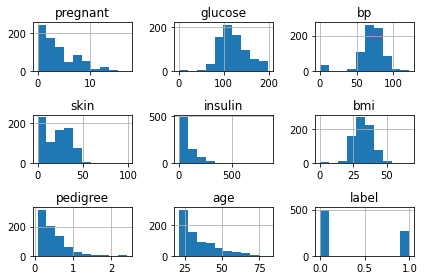

In [50]:
plt.figure(figsize=(20,20))
diabetes_df.hist()
plt.tight_layout()
plt.show()

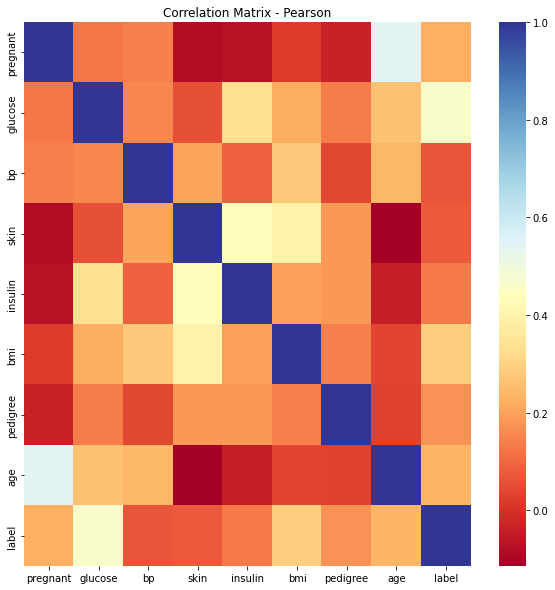

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(diabetes_df.corr(method='pearson'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

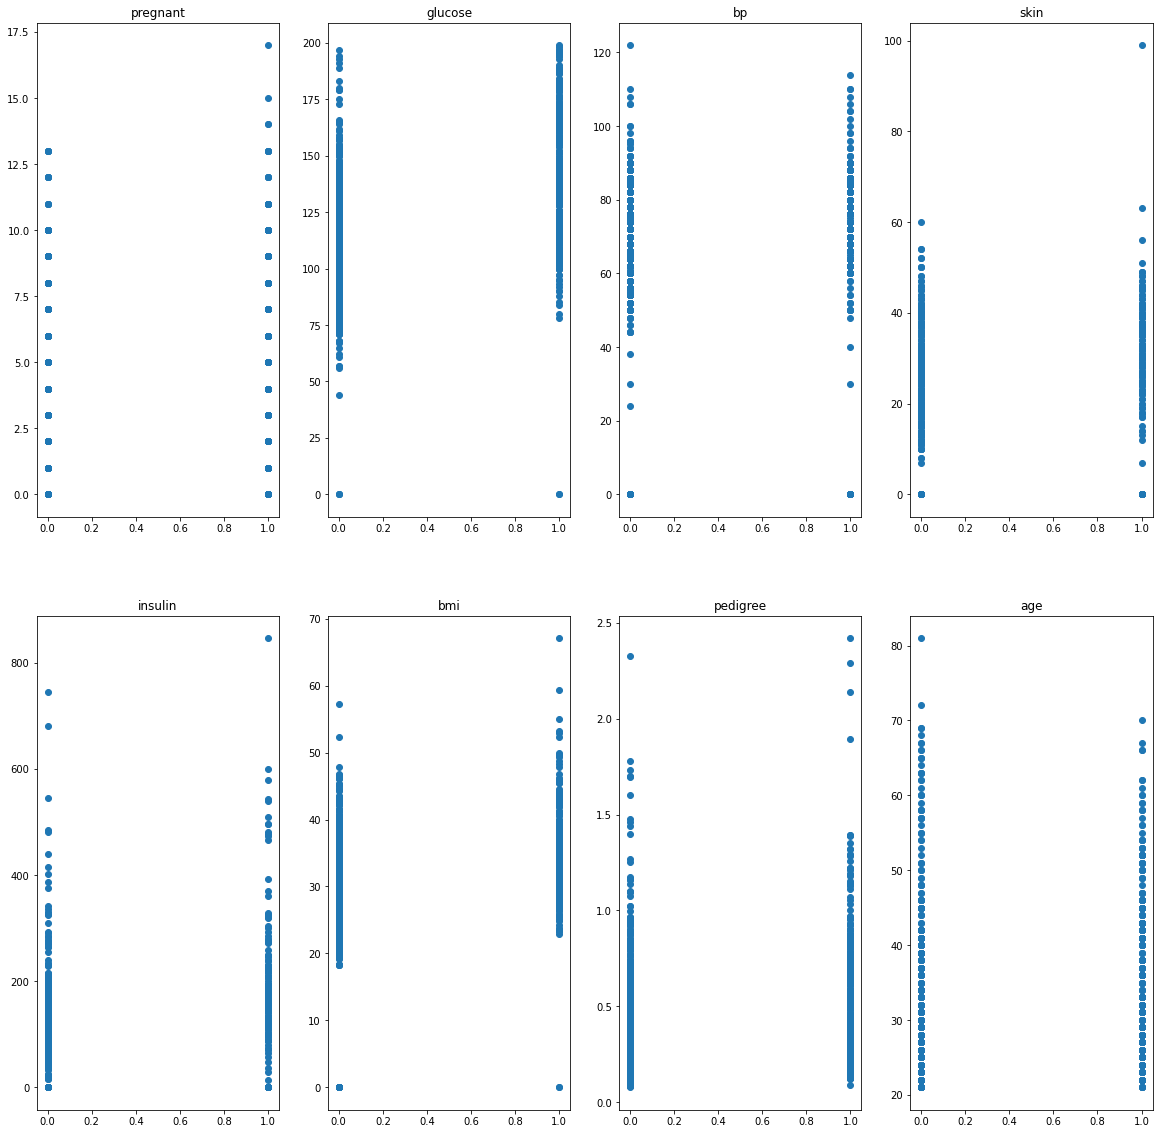

In [53]:
features = diabetes_df.columns[0:-1]
label = diabetes_df['label']
f, ax = plt.subplots(2,4, figsize=(20,20))
i = 0
for j in range(2):
  for a in ax[j]:
    if i < 11:
      a.scatter(label, diabetes_df[features[i]])
      a.set_title(features[i])
      i += 1

In [54]:
diabetes_df['label'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64

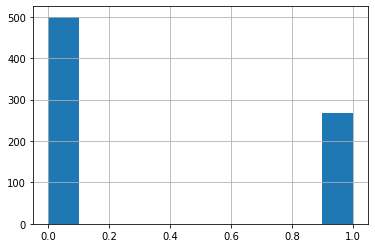

In [55]:
diabetes_df['label'].hist()

### Selección de los features

In [56]:
# Spliteamos el dataset en los features y la variable objetivo

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = diabetes_df[feature_cols] # Features
y = diabetes_df.label # Target variable

### Splitting Data

Para comprender el rendimiento del modelo, dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba es una buena estrategia.

Usamos la función train_test_split(). Necesitamos 3 parametros: features, target y test_set size.


In [57]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test|

### Building Decision Tree Model

Vamos a crear el Decision Tree Model usando Scikit-learn.

In [58]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluamos el modelo

Calculamos la accuracy

In [59]:
# Model Accuracy, Cuantas veces el modelo acierta en las predicciones?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6926406926406926


### Visualizamos el Decision Trees

Usamos Scikit-learn's `plot_tree`.

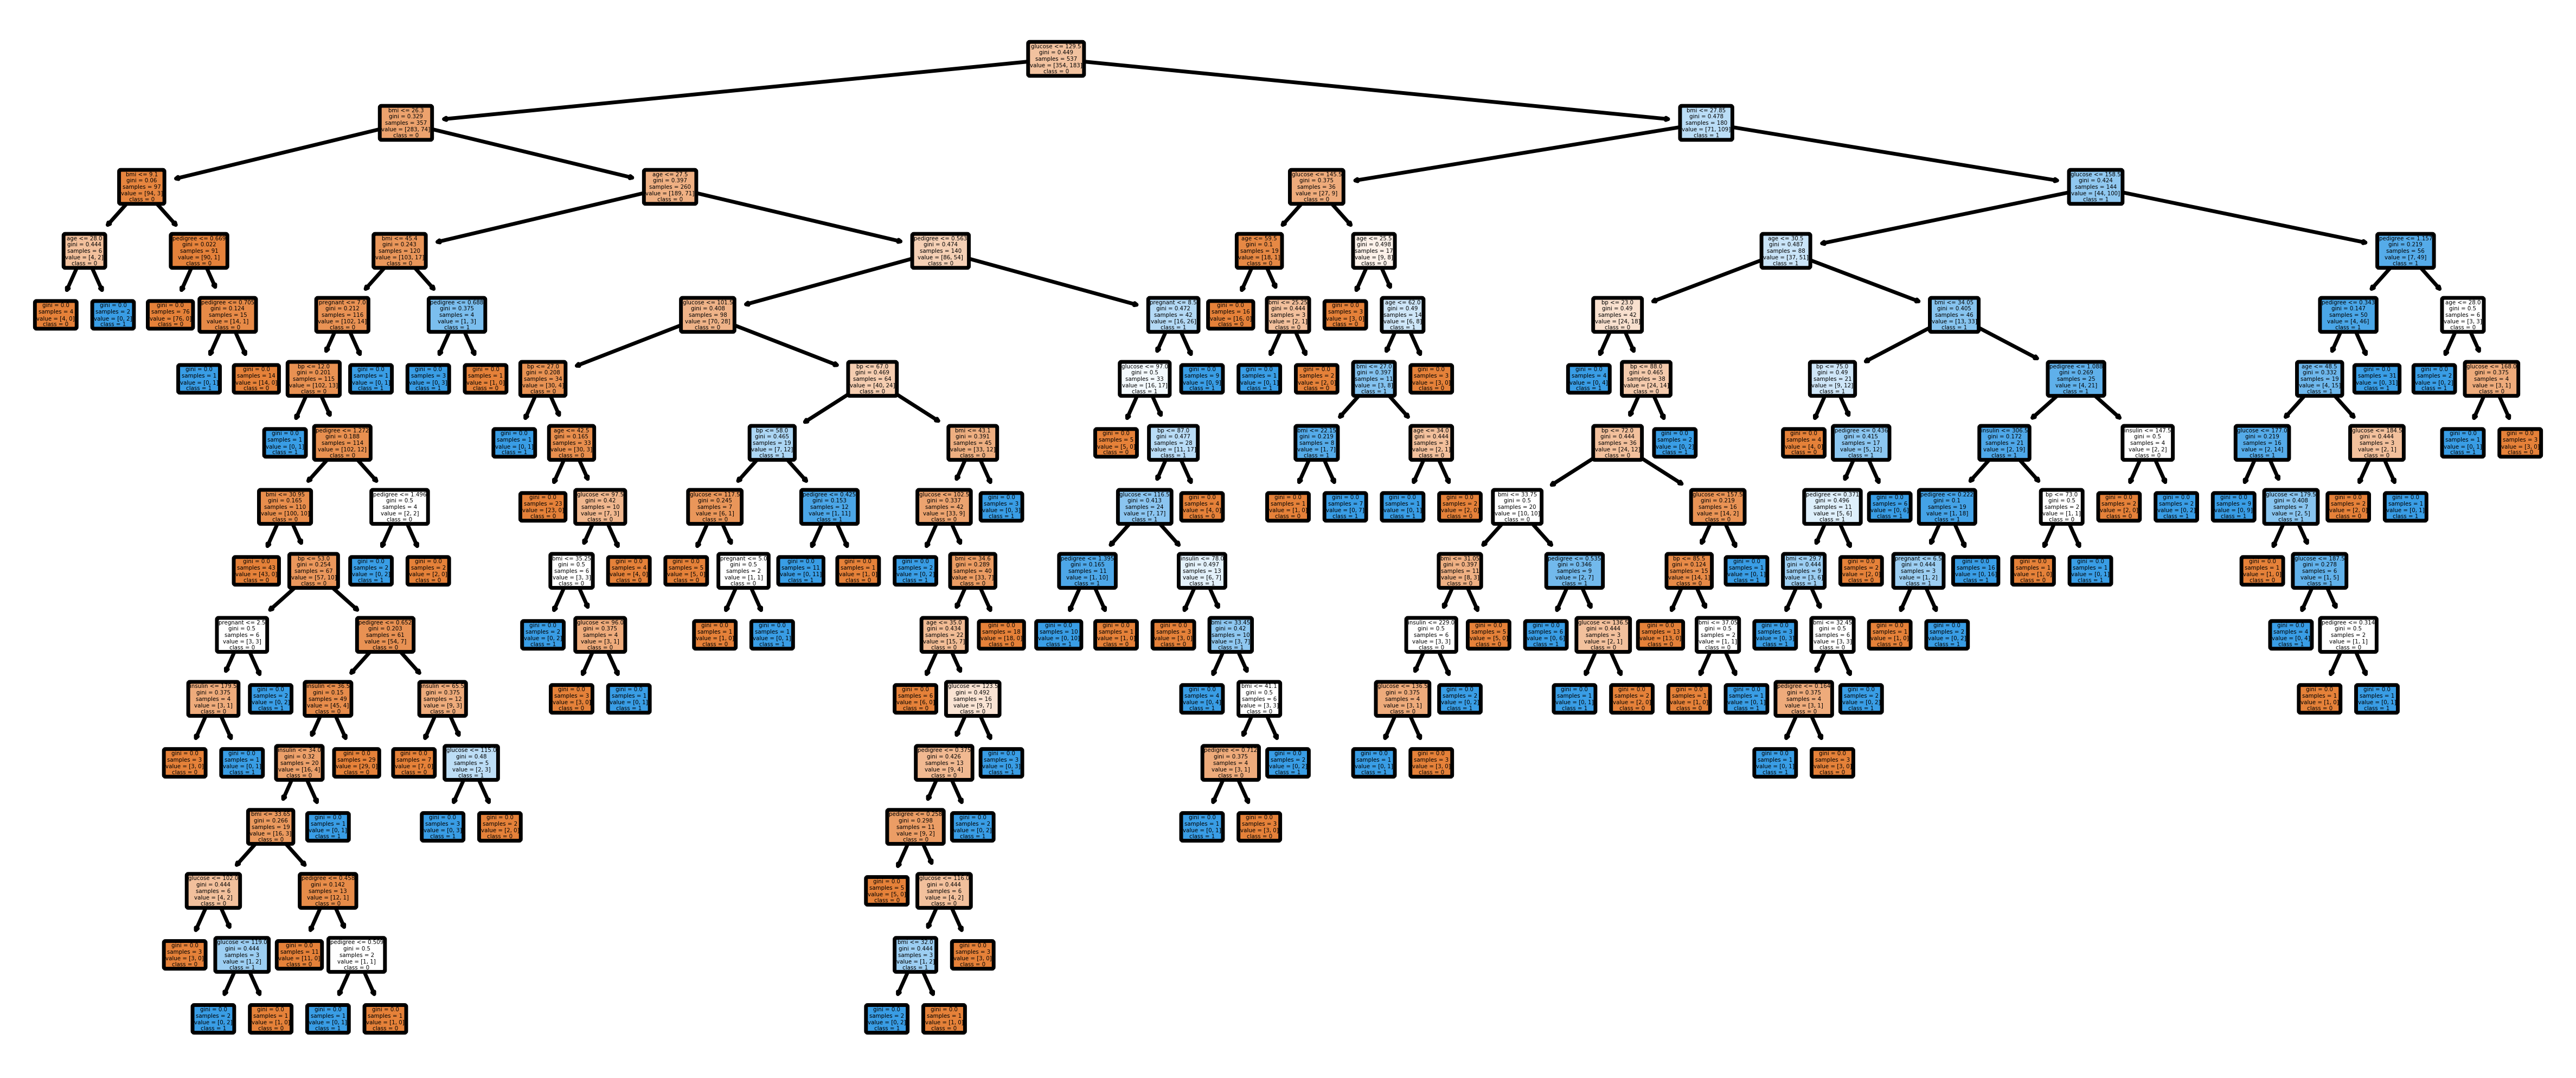

In [60]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(clf,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);


In the decision tree chart, each internal node has a decision rule that splits the data. Gini referred as Gini ratio, which measures the impurity of the node. You can say a node is pure when all of its records belong to the same class, such nodes known as the leaf node.  

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.


## Optimizamos la performance del Decision Tree

- **criterion :  opcional (default=”gini”) o elija la medida de selección de atributos**: Este parámetro nos permite utilizar la medida de selección de atributo diferente-diferente. Los criterios admitidos son "gini" para el índice de Gini y "entropy" para la obtención de información.

- **splitter : string, opcional (default=”best”) or Split Strategy**: Este parámetro nos permite elegir la estrategia de split. Las estrategias admitidas son "mejores" para elegir la mejor división y "aleatoria" para elegir la mejor división aleatoria.

- **max_depth : int or None, opcional (default=None) or Maximum Depth of a Tree**: La profundidad máxima del árbol. Si es Ninguno, los nodos se expanden hasta que todas las hojas contienen menos de min_samples_split muestras. El valor más alto de la profundidad máxima provoca un ajuste excesivo y un valor más bajo provoca un ajuste insuficiente. ([Fuente](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).


In [ ]:
# Create Decision Tree classifer object
diabetes_df = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
diabetes_df = diabetes_df.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = diabetes_df.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


### Visualizing Decision Trees


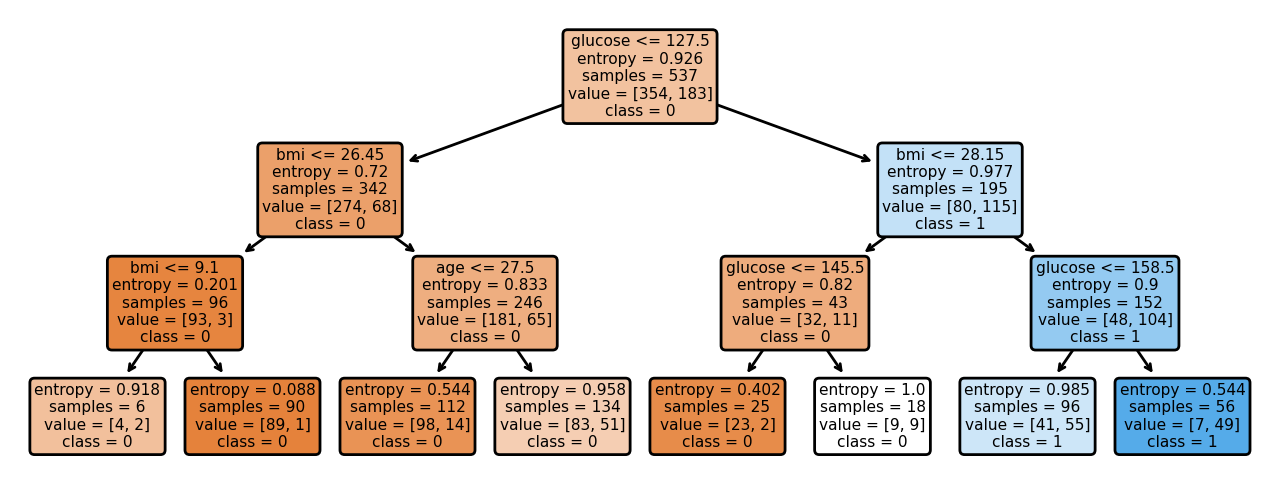

In [ ]:
plt.figure(figsize=(8, 3), dpi=200)
tree.plot_tree(diabetes_df,
               feature_names=feature_cols,
               class_names=["0", "1"],
               filled=True,
               rounded=True);
# plt.savefig('graphics/diabetes.png')

Este modelo podado es menos complejo, explicable y fácil de entender que el diagrama del modelo de árbol de decisión anterior.

## Pros

- Son faciles de implementar y de visualizar
- Puede capturar fácilmente patrones no lineales.
- Requiere menos procesamiento previo de datos por parte del usuario, por ejemplo, no hay necesidad de normalizar columnas.
- Se puede utilizar para la ingeniería de características, como la predicción de valores perdidos, adecuado para la selección de variables.
- El árbol de decisiones no tiene supuestos sobre la distribución debido a la naturaleza no paramétrica del algoritmo.
([Fuente](https://scikit-learn.org/stable/modules/tree.html))

## Cons

- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.
